In [3]:
# Purpose: Calculate LST

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 9.7 MB/s  0:00:029.4 MB/s eta 0:00:01:01
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [rasterio]━━ 3/4 [rasterio]


In [1]:
import rasterio
from rasterio.windows import from_bounds
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import geopandas as gpd




In [2]:
# open band 4 red
band4 = rasterio.open('landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B4.tif') #red

#number of raster rows
band4.height
#number of raster columns
band4.width
#plot band 
plt.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(8211, 8131), dtype=uint16)

In [3]:
# Open band 5 near-infrared
band5 = rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B5.tif") #nir

# Open band 3 green for MNDWI = modified normalized difference water index
band3 = rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B3.tif") 
# Open band 6 middle-infrared for MNDWI = modified normalized difference water index
band6 = rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B5.tif") 


Min: 0.0
Max: 35996.0
Mean: 15302.267427940307
Unique Values: [    0. 21436. 21439. ... 35898. 35926. 35996.]


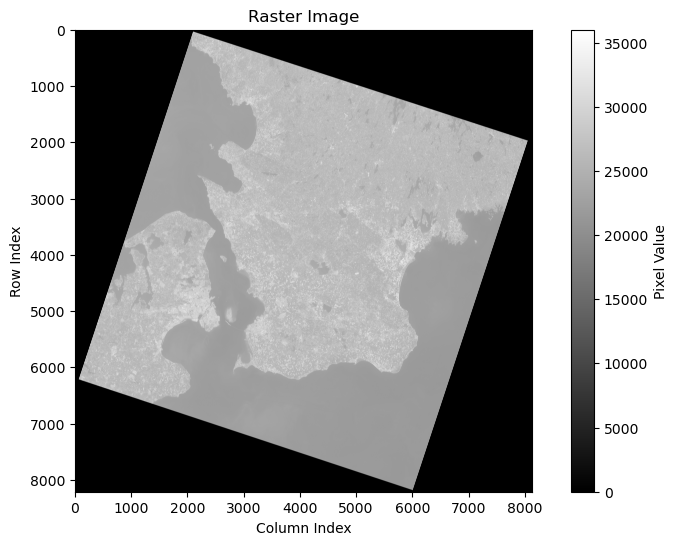

In [4]:
# Open band 10
band10 = rasterio.open('landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B10.tif') #red

# Debugging: Check NDVI values
print("Min:", np.min(band10.read(1).astype('float64')))
print("Max:", np.max(band10.read(1).astype('float64')))
print("Mean:", np.mean(band10.read(1).astype('float64')))
print("Unique Values:", np.unique(band10.read(1).astype('float64')))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(band10.read(1).astype('float64'), cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

atmo_spec_rad Min: -0.18999999999999997
atmo_spec_rad Max: 11.8398632
atmo_spec_rad Mean: 4.924017774417651
atmo_spec_rad Unique Values: [-0.19       6.9739112  6.9749138 ... 11.8071116 11.8164692 11.8398632]


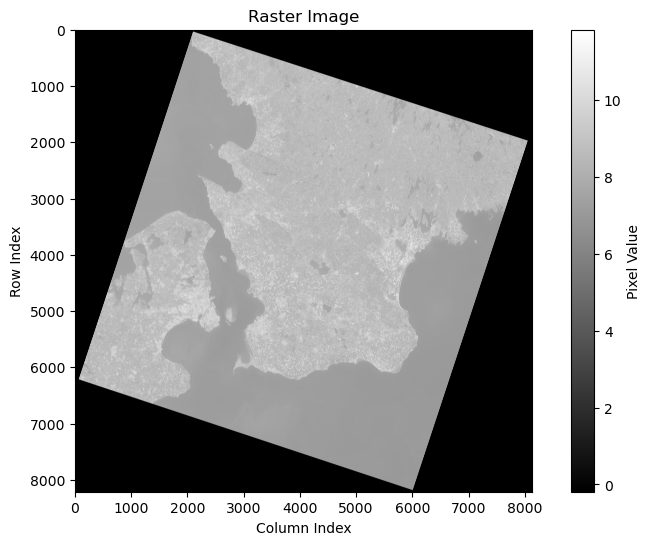

In [5]:
#F1.3.1 Atmosphere spectral radiance of band 10
#ML = band-specific multiplicative rescaling factor = RADIANCE_MULT_BAND_10 = 3.3420E-04
#Qcal = band 10
#AL = band-specific additive rescaling factor = RADIANCE_ADD_BAND_10 = 0.10000
# Convert DN to TOA reflectance
atmo_spec_rad_band10 = 0.0003342 * band10.read(1).astype('float64') + 0.10000-0.29

# Debugging: Check NDVI values
print("atmo_spec_rad Min:", np.min(atmo_spec_rad_band10))
print("atmo_spec_rad Max:", np.max(atmo_spec_rad_band10))
print("atmo_spec_rad Mean:", np.mean(atmo_spec_rad_band10))
print("atmo_spec_rad Unique Values:", np.unique(atmo_spec_rad_band10))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(atmo_spec_rad_band10, cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

/var/folders/lv/q611jf7n7jqdmn102pr9m73w0000gp/T/ipykernel_82532/3249563911.py:4: RuntimeWarning: invalid value encountered in log
  brigthness_temp = (1321.0789/np.log((774.8853/atmo_spec_rad_band10)+1))-273.15


brigthness_temp Min: nan
brigthness_temp Max: nan
brigthness_temp Mean: nan
brigthness_temp Unique Values: [ 6.76934053  6.77779096  6.78060761 ... 41.51584109 41.66191749
         nan]


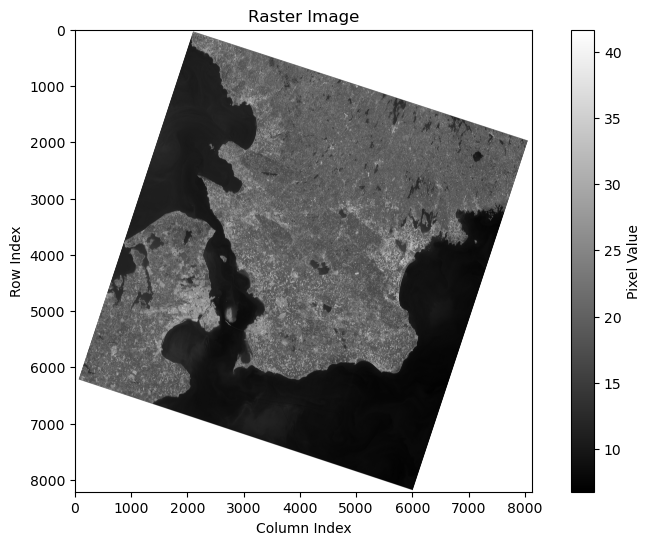

In [7]:
#F1.3 Brigtness temperature
# K1 = the first band-specific calibration constant = 774.89 = K1_CONSTANT_BAND_10 = 774.8853
# K2 = the second band-specific calibration constant = 1321.08 = K2_CONSTANT_BAND_10 = 1321.0789
brigthness_temp = (1321.0789/np.log((774.8853/atmo_spec_rad_band10)+1))-273.15
#brigthness_temp = 1321.0789/(np.log(774.8853/(atmo_spec_rad+1)))-273.15
# this is the standard method: Tb = K2 / np.log((K1 / L) + 1)

# Debugging: Check NDVI values
print("brigthness_temp Min:", np.min(brigthness_temp))
print("brigthness_temp Max:", np.max(brigthness_temp))
print("brigthness_temp Mean:", np.mean(brigthness_temp))
print("brigthness_temp Unique Values:", np.unique(brigthness_temp))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(brigthness_temp, cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

/var/folders/lv/q611jf7n7jqdmn102pr9m73w0000gp/T/ipykernel_82532/863481518.py:10: RuntimeWarning: invalid value encountered in divide
  (nir - red) / (nir + red)


ndvi Min: -1.0
ndvi Max: 1.0
ndvi Mean: 0.13286447058881645
ndvi Unique Values: [-1.         -0.37715517 -0.28680507 ...  0.6692437   0.67208499
  1.        ]


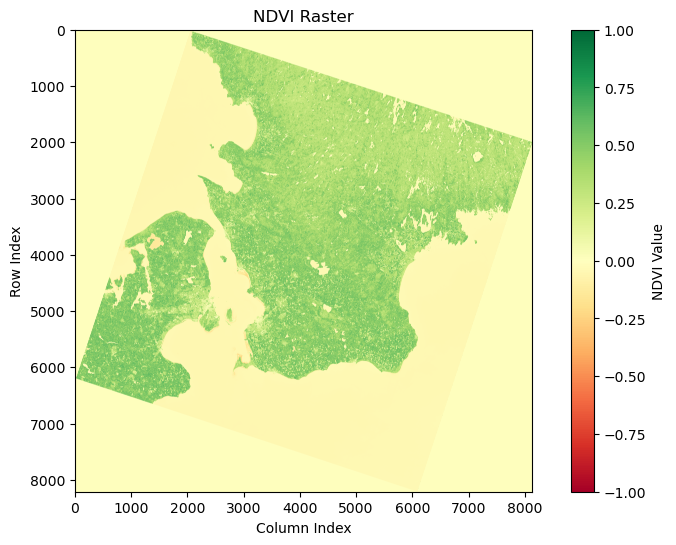

In [8]:
#F1.2.1.1 NDVI
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

# NDVI calculation, setting empty or no-data cells to 0
ndvi = np.where(
    (nir + red) == 0.,  # Avoid division by zero
    0, 
    (nir - red) / (nir + red)
)

# Debugging: Check NDVI values
print("ndvi Min:", np.min(ndvi))
print("ndvi Max:", np.max(ndvi))
print("ndvi Mean:", np.mean(ndvi))
print("ndvi Unique Values:", np.unique(ndvi))

# Display NDVI raster
fig = plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)  # Use 'RdYlGn' for vegetation contrast
plt.colorbar(label="NDVI Value")
plt.title("NDVI Raster")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

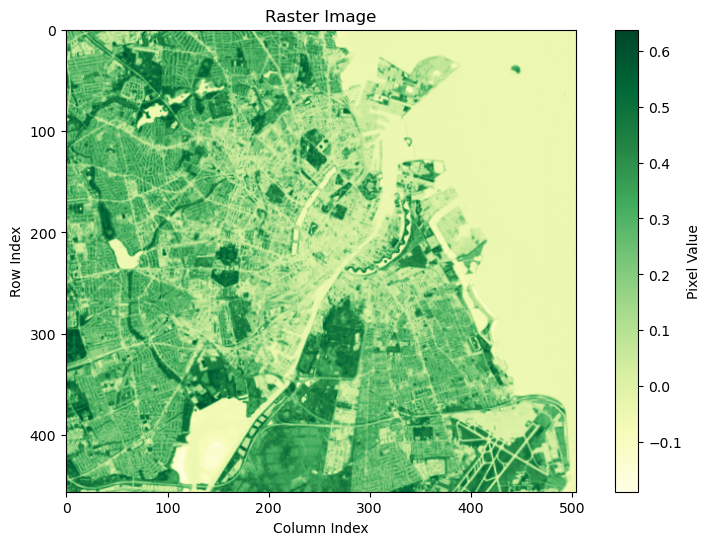

In [10]:
# NDVI AS A PARAMETER TO STORE
input_path = "landsat20200601/ndvi_draft.tif"
template_path = "landsat20180603/lst_case.tif"
output_path = "landsat20200601/ndvi_20200601.tif"

# update metadata 
with rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B5.tif") as src:   # use the same file you used for `band4`
    data = src.read(1)
    meta = src.meta.copy()

meta.update({
    "dtype": "float32",
    "count": 1,
    "nodata": np.nan
})

with rasterio.open(input_path, "w", **meta) as dst:
    dst.write(ndvi.astype("float32"), 1)

# transform vegetation to raster template
with rasterio.open(input_path) as src, rasterio.open(template_path) as tpl:

    kwargs = tpl.meta.copy()
    kwargs.update({
        "count": src.count,
        "dtype": "float32",        # important for averaging
        "nodata": src.nodata
    })

    with rasterio.open(output_path, "w", **kwargs) as ndvi_ras:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(ndvi_ras, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=tpl.transform,
                dst_crs=tpl.crs,
                resampling=Resampling.average
            )

ndvi_ras = rasterio.open(output_path) 

# Plot vegetation transformed
plt.figure(figsize=(10, 6))
plt.imshow(ndvi_ras.read(1).astype('float64'), cmap='YlGn')  
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

prop_of_veg Min: 0.0
prop_of_veg Max: 1.0
prop_of_veg Mean: 0.5664322352944082
prop_of_veg Unique Values: [0.         0.31142241 0.35659746 ... 0.83462185 0.83604249 1.        ]


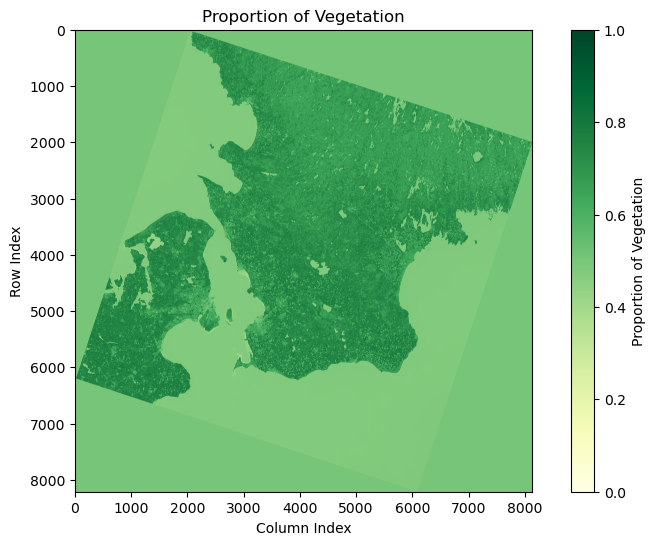

In [11]:
#F1.2.1 Proportion of vegetation 

prop_of_veg = (ndvi-np.min(ndvi))/(np.max(ndvi)-np.min(ndvi))

# Debugging: Check NDVI values
print("prop_of_veg Min:", np.min(prop_of_veg))
print("prop_of_veg Max:", np.max(prop_of_veg))
print("prop_of_veg Mean:", np.mean(prop_of_veg))
print("prop_of_veg Unique Values:", np.unique(prop_of_veg))

# Plot the NDVI raster
plt.figure(figsize=(10, 6))
plt.imshow(prop_of_veg, cmap='YlGn', vmin=np.min(prop_of_veg), vmax=np.max(prop_of_veg))  # 'YlGn' for vegetation
plt.colorbar(label="Proportion of Vegetation")
plt.title("Proportion of Vegetation")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()


emissivity Min: 0.986
emissivity Max: 0.99
emissivity Mean: 0.9882657289411775
emissivity Unique Values: [0.986      0.98724569 0.98742639 ... 0.98933849 0.98934417 0.99      ]


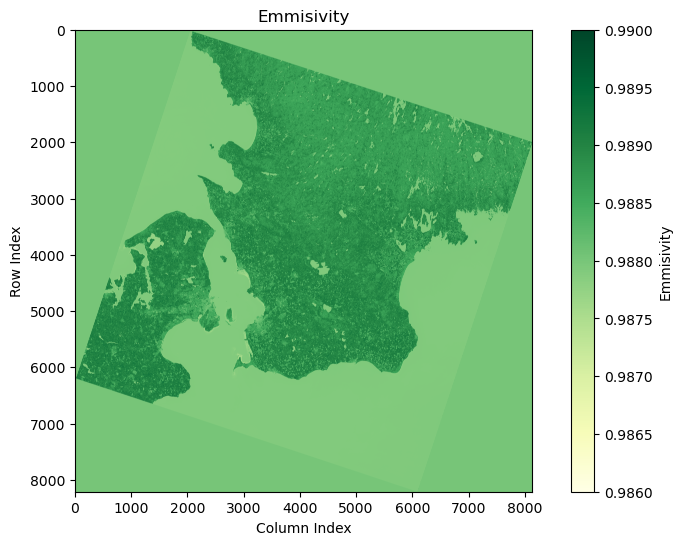

In [12]:
# F1.2 land surface emmisivity
emissivity=0.004*prop_of_veg+0.986

# Debugging: Check NDVI values
print("emissivity Min:", np.min(emissivity))
print("emissivity Max:", np.max(emissivity))
print("emissivity Mean:", np.mean(emissivity))
print("emissivity Unique Values:", np.unique(emissivity))

# Plot the NDVI raster
plt.figure(figsize=(10, 6))
plt.imshow(emissivity, cmap='YlGn', vmin=np.min(emissivity), vmax=np.max(emissivity))  # 'YlGn' for vegetation
plt.colorbar(label="Emmisivity")
plt.title("Emmisivity")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

lst Min: nan
lst Max: nan
lst Mean: nan
lst Unique Values: [ 6.76976222  6.7782141   6.78103108 ... 41.53156609 41.67775057
         nan]


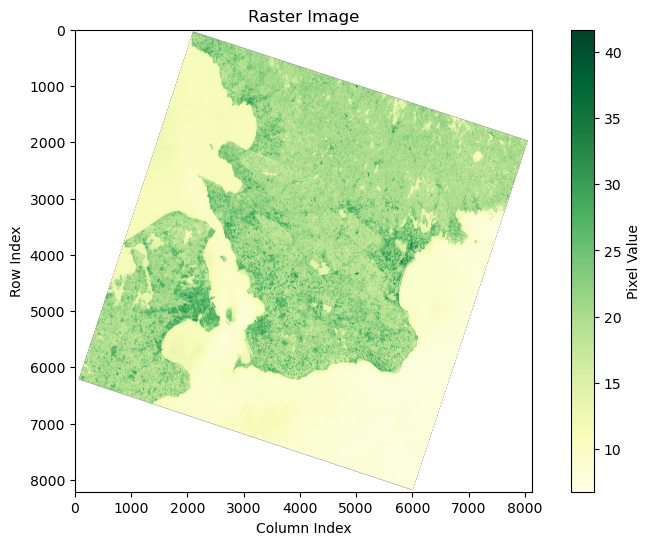

In [13]:
#F1.1 Constant P
#h=6.626*10^(-34)
#c=2.998*(10^8)
#bolz=1.38*10^(-23)
constant_p = 6.626e-34 * (2.998e8) / (1.38e-23) # in m·K
# Convert to µm·K (multiply by 10^6)
constant_p_micrometer = constant_p * 1e6

#F1 Land surface temperature
lst = brigthness_temp/(1+10.9*(brigthness_temp/constant_p_micrometer)*np.log(emissivity))
#lst = brigthness_temp/(1+10.9*(brigthness_temp/14388)*np.log(emissivity))

# Debugging: Check NDVI values
print("lst Min:", np.min(lst))
print("lst Max:", np.max(lst))
print("lst Mean:", np.mean(lst))
print("lst Unique Values:", np.unique(lst))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(lst, cmap='YlGn')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

#Source: https://riski-saputra.medium.com/mapping-land-surface-temperature-lst-using-landsat-8-imagery-in-arcmap-99bd64f2c3fa

In [14]:
# CALCULATE MNDWI 

#generate nir and red objects as arrays in float64 format
green = band3.read(1).astype('float64') #green band
mir = band6.read(1).astype('float64') #middle infra-red band 

# MNDWI calculation, setting empty or no-data cells to 0
mndwi = np.where(
    (green - mir) == 0.,  # Avoid division by zero
    0, 
    (green - mir) / (green + mir)
)

# Debugging: Check NDVI values
print("mndwi Min:", np.min(mndwi))
print("mndwi Max:", np.max(mndwi))
print("mndwi Mean:", np.mean(mndwi))
print("mndwi Unique Values:", np.unique(mndwi))


/var/folders/lv/q611jf7n7jqdmn102pr9m73w0000gp/T/ipykernel_82532/1357662350.py:11: RuntimeWarning: invalid value encountered in divide
  (green - mir) / (green + mir)


mndwi Min: -1.0
mndwi Max: 1.0
mndwi Mean: -0.09895500595339637
mndwi Unique Values: [-1.         -0.66709064 -0.60742323 ...  0.47077179  0.47490825
  1.        ]


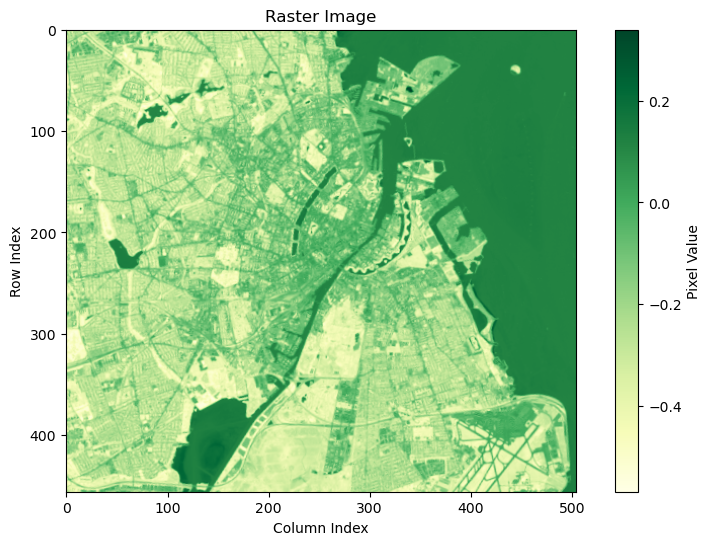

In [16]:
# MNDWI AS A PARAMETER TO STORE
input_path = "landsat20200601/mndwi_draft.tif"
template_path = "landsat20180603/lst_case.tif"
output_path = "landsat20200601/mndwi_20200601.tif"

# update metadata 
with rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B3.tif") as src:   # use the same file you used for `band4`
    data = src.read(1)
    meta = src.meta.copy()

meta.update({
    "dtype": "float32",
    "count": 1,
    "nodata": np.nan
})

with rasterio.open(input_path, "w", **meta) as dst:
    dst.write(mndwi.astype("float32"), 1)

# transform vegetation to raster template
with rasterio.open(input_path) as src, rasterio.open(template_path) as tpl:

    kwargs = tpl.meta.copy()
    kwargs.update({
        "count": src.count,
        "dtype": "float32",        # important for averaging
        "nodata": src.nodata
    })

    with rasterio.open(output_path, "w", **kwargs) as mndwi_ras:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(mndwi_ras, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=tpl.transform,
                dst_crs=tpl.crs,
                resampling=Resampling.average
            )

mndwi_ras = rasterio.open(output_path) 

# Plot vegetation transformed
plt.figure(figsize=(10, 6))
plt.imshow(mndwi_ras.read(1).astype('float64'), cmap='YlGn')  
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

In [ ]:
# Open original raster to get metadata
with rasterio.open(
    'landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B4.tif'
) as src:
    meta = src.meta.copy()

# Update metadata for your calculated array
meta.update({
    "dtype": lst.dtype,
    "count": 1
})

# Write new raster with same metadata
with rasterio.open("landsat20200601/lst_20200601_final.tif", "w", **meta) as dst:
    dst.write(lst, 1)

In [13]:
# Transfer raster to template raster 
input_path = "landsat20200601/lst_20200601_final.tif"
template_path = "landsat20180603/LST_case.tif"
output_path = "landsat20200601/lst_20200601_casedraft.tif"

with rasterio.open(input_path) as src_input, rasterio.open(template_path) as src_template:
    # Target CRS
    dst_crs = src_template.crs
    
    # Calculate transform, width, height for target CRS
    transform, width, height = calculate_default_transform(
        src_input.crs,
        dst_crs,
        src_input.width,
        src_input.height,
        *src_input.bounds
    )
    
    # Update metadata
    kwargs = src_input.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })
    
    # Reproject and write new raster
    with rasterio.open(output_path, "w", **kwargs) as dst:
        for i in range(1, src_input.count + 1):
            reproject(
                source=rasterio.band(src_input, i),
                destination=rasterio.band(dst, i),
                src_transform=src_input.transform,
                src_crs=src_input.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.bilinear  
            )


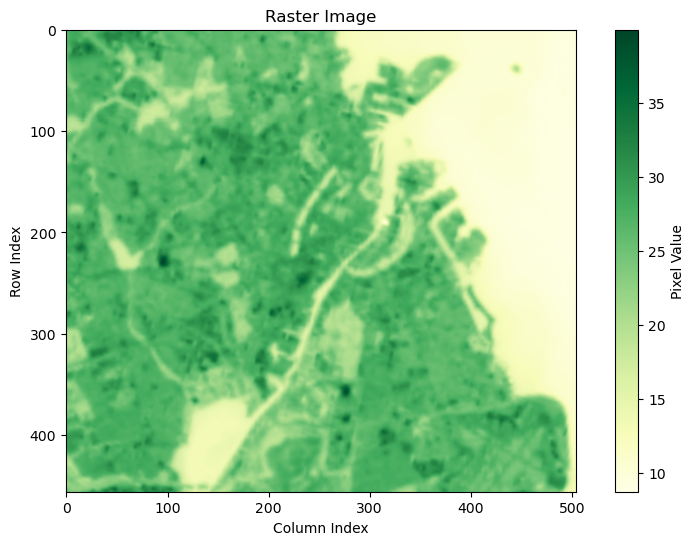

In [14]:
# Make extent match template raster
with rasterio.open("landsat20200601/lst_20200601_casedraft.tif") as src_lst, rasterio.open("landsat20180603/LST_case.tif") as src_mask:
    
    # Make sure CRS matches
    if src_lst.crs != src_mask.crs:
        raise ValueError("CRS mismatch!")

    # Get bounds of mask raster
    bounds2 = src_mask.bounds

    # Compute overlapping window on lst
    window = from_bounds(bounds2.left, bounds2.bottom, bounds2.right, bounds2.top, transform=src_lst.transform)

    # Read the window
    rast1_cropped = src_lst.read(1, window=window)

    # Update transform for the cropped array
    transform_cropped = src_lst.window_transform(window)

    # Update metadata
    meta = src_lst.meta.copy()
    meta.update({
        "height": rast1_cropped.shape[0],
        "width": rast1_cropped.shape[1],
        "transform": transform_cropped
    })

# Optionally write out
with rasterio.open("landsat20200601/lst_20200601_final.tif", "w", **meta) as dst:
    dst.write(rast1_cropped, 1)

dst = rasterio.open("landsat20200601/lst_20200601_final.tif")
    
# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(dst.read(1).astype('float64'), cmap='YlGn')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

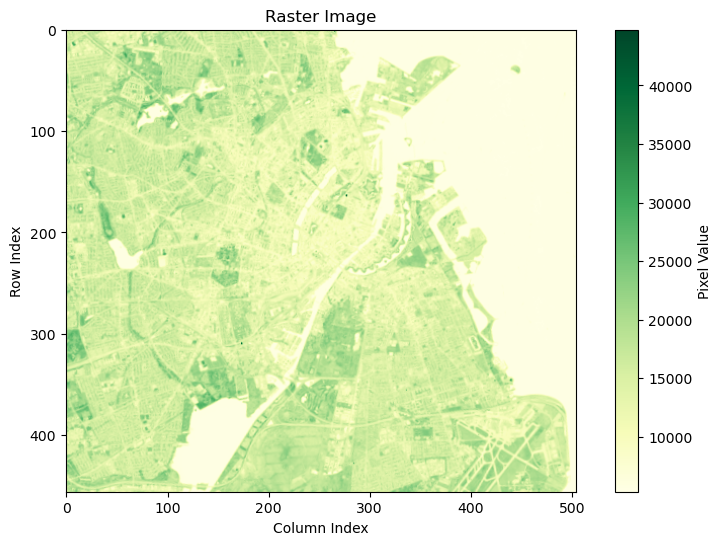

In [15]:
# VEGETATION PERCENTAGE AS A STORED PARAMETER
input_path = "landsat20200601/prop_of_veg_draft.tif"
template_path = "landsat20180603/LST_case.tif"
output_path = "landsat20200601/prop_of_veg20200601.tif"

# update metadata 
with rasterio.open("landsat20200601/LC08_L1TP_194021_20200601_20200824_02_T1_B5.tif") as src:   # use the same file you used for `band4`
    data = src.read(1)
    meta = src.meta.copy()

meta.update({
    "dtype": "float32",
    "count": 1,
    "nodata": np.nan
})

with rasterio.open(input_path, "w", **meta) as dst:
    dst.write(data.astype("float32"), 1)

# transform vegetation to raster template
with rasterio.open(input_path) as src, rasterio.open(template_path) as tpl:

    kwargs = tpl.meta.copy()
    kwargs.update({
        "count": src.count,
        "dtype": "float32",        # important for averaging
        "nodata": src.nodata
    })

    with rasterio.open(output_path, "w", **kwargs) as prop_of_veg:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(prop_of_veg, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=tpl.transform,
                dst_crs=tpl.crs,
                resampling=Resampling.average
            )

prop_of_veg = rasterio.open(output_path) 

# Plot vegetation transformed
plt.figure(figsize=(10, 6))
plt.imshow(prop_of_veg.read(1).astype('float64'), cmap='YlGn')  
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

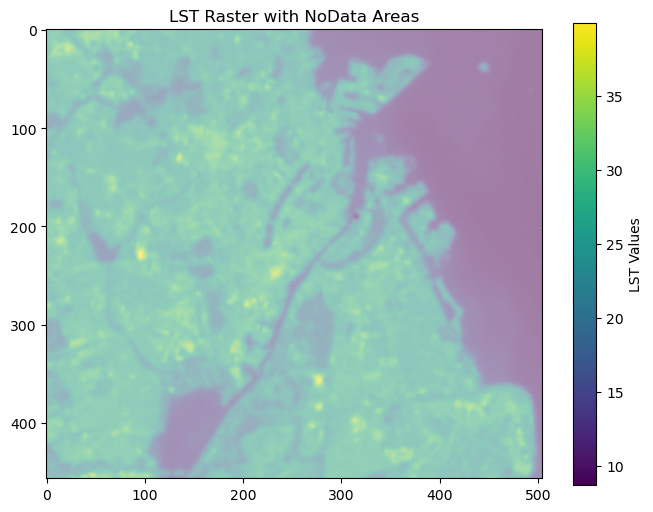

In [16]:
# SETUP - LST
lst = rasterio.open('landsat20200601/lst_20200601_final.tif').read(1).astype('float64') # Land surface temperature in study area Copenhagen

# Set NoData in LST
min_value = np.nanmin(lst)  # Find minimum value (excluding NaNs)
# Set min value as nodata
lst[lst == min_value] = np.nan
#src.nodata = min_value  # Update nodata in metadata

# Create nodata mask
nodata_mask = np.isnan(lst)

# Plot raster and nodata areas
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(lst, cmap="viridis", interpolation="none")
plt.colorbar(cax, label="LST Values")

# Overlay nodata areas
ax.imshow(nodata_mask, cmap="Reds", alpha=0.5)  # Red overlay for nodata areas
ax.set_title("LST Raster with NoData Areas")
plt.show()

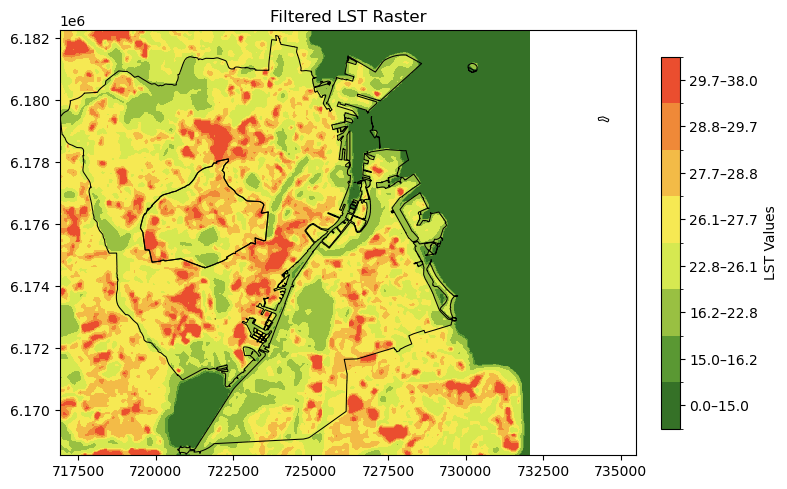

In [17]:
# LST FOR VISUALISATION
studyarea = gpd.read_file('analysis_input_data/case_study.gpkg') 

# Set NoData in LST
min_value = np.nanmin(lst)  # Find minimum value (excluding NaNs)
# Set min value as nodata
lst[lst == min_value] = np.nan
#src.nodata = min_value  # Update nodata in metadata

# Create nodata mask
nodata_mask = np.isnan(lst)

# Define class edges and colors
lst_new_colorbins_lst = [0, 15.0, 16.2, 22.8, 26.1, 27.7, 28.8, 29.7, 38.0]
lst_new_colors_lst = ["#357127", "#5A9833", "#99C042", "#D6E951", "#F6E953", "#F3BB47", "#EF8938", "#EA4E2F"]
#lst_new_classes_lst = np.digitize(lst, lst_new_colorbins_lst, right=False) - 1
#lst_new_classes_lst[np.isnan(lst)] = -1  # mark NoData as -1
# Create colormap
lst_new_cmap_lst = ListedColormap(lst_new_colors_lst)
norm_lst = BoundaryNorm(lst_new_colorbins_lst, lst_new_cmap_lst.N)

# Assume you have a raster with transform
from rasterio.plot import plotting_extent

# Suppose lst comes from a raster file
with rasterio.open("landsat20200601/lst_20200601_final.tif") as src:
    lst = src.read(1)
    raster_extent = plotting_extent(src)  # returns (x_min, x_max, y_min, y_max)

# Example if you don't have transform:
height, width = lst.shape
extent = (0, width, 0, height)  # x_min, x_max, y_min, y_max
# If you have actual georeference:
# extent = rasterio.plot.plotting_extent(raster_dataset)

# Plot the filtered raster
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(
    lst,
    cmap=lst_new_cmap_lst,
    norm=norm_lst,
    interpolation="none", 
    extent=raster_extent
)

# Plot study area on top
studyarea.boundary.plot(
    ax=ax, 
    edgecolor="#000000", 
    linewidth=0.75, 
    zorder=2)

cbar = fig.colorbar(cax, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("LST Values")
cbar.set_ticks([(lst_new_colorbins_lst[i]+lst_new_colorbins_lst[i+1])/2 for i in range(len(lst_new_colorbins_lst)-1)])
cbar.set_ticklabels([f"{lst_new_colorbins_lst[i]:.1f}–{lst_new_colorbins_lst[i+1]:.1f}" for i in range(len(lst_new_colorbins_lst)-1)])

ax.set_title("Filtered LST Raster")
plt.savefig("map_lst20200601.png", dpi=500, bbox_inches="tight")
plt.show()

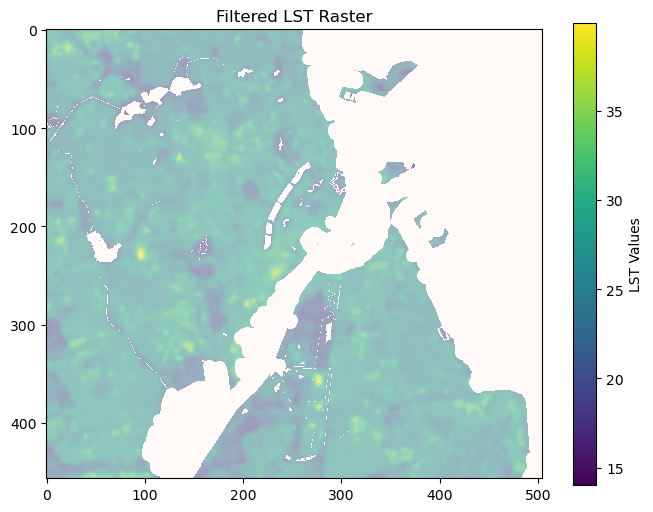

mean of LST is  22.56159941118722
min of LST is  8.718465176079048
max of LST is  39.937144630998084
mean of LST is  26.629893338362066
min of LST is  14.027825493696145
max of LST is  39.937144630998084


In [19]:
# SETUP
# import rasters
lakes_case = rasterio.open('analysis_input_data/lakes_case.tif').read(1).astype('float64') # lakes=1 
lake_dist = rasterio.open('analysis_input_data/lakes_euc_dist.tif').read(1).astype('float64') # distances in metres to nearest lake
seas_case = rasterio.open('analysis_input_data/seas_case.tif').read(1).astype('float64') # sea=1
sea_dist = rasterio.open('analysis_input_data/seas_euc_dist.tif').read(1).astype('float64') # distances in metres to sea

# Apply NoData mask from lst to all the other rasters
lake_dist[nodata_mask] = np.nan  # Set NoData where lst had NoData
lakes_case[nodata_mask] = np.nan  # Set NoData where lst had NoData
sea_dist[nodata_mask] = np.nan  # Set NoData where lst had NoData
seas_case[nodata_mask] = np.nan  # Set NoData where lst had NoData

# Statistics of LST heatwave dataset 
stat_lst_mask = ~np.isnan(lake_dist) & ~np.isnan(lst) & (seas_case != 1) & (sea_dist > 195) & (lakes_case != 1)
stat_lst_raster = lst.copy()
stat_lst_raster[~stat_lst_mask] = np.nan  # set unselected pixels to NaN
#stat_lst = lst[stat_lst_mask]

# Plot the filtered raster
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(stat_lst_raster, cmap="viridis", interpolation="none")
plt.colorbar(cax, label="LST Values")

# Optional: overlay NoData areas in red
ax.imshow(np.isnan(stat_lst_mask), cmap="Reds", alpha=0.5)

ax.set_title("Filtered LST Raster")
plt.show()

print("mean of LST is ", np.nanmean(lst))
print("min of LST is ", np.nanmin(lst))
print("max of LST is ", np.nanmax(lst))
print("mean of LST is ", np.nanmean(stat_lst_raster))
print("min of LST is ", np.nanmin(stat_lst_raster))
print("max of LST is ", np.nanmax(stat_lst_raster))